## Problem Definition
Based on the data predict whether the patient has Diabetes or not.

### Data
The original data came from the Cleaveland data from the UCI machine learning repository. There is also a version of it available on kaggle https://www.kaggle.com/uciml/pima-indians-diabetes-database



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\user\Downloads\diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(768, 9)

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

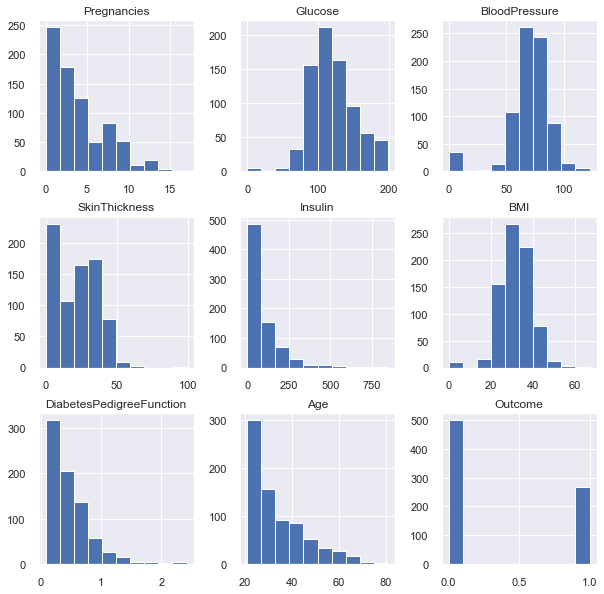

In [54]:
df.hist(figsize=(10, 10))


In [15]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Modelling

In [8]:
x = df.drop('Outcome', axis =1)

In [9]:
y = df['Outcome']

In [16]:
# splitting data into train and test set

from sklearn.model_selection import train_test_split
np.random.seed(6)

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [17]:
#Let's try Logistic Regression

from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\user\Desktop\h_d_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(x_test, y_test)

0.7792207792207793

In [23]:
# lets check with RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(x_train,y_train)
clf.score(x_test, y_test)

0.7727272727272727

In [24]:
# both baseline model performs somehow similar, so we'll proceed further by Logistic Regression model

**Hyperparameter Tuning(Logistic Regression)**

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# Create Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

In [33]:
#Tune LogisticRegression
np.random.seed(42)

#setup random Hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv= 5,
                               n_iter = 20,
                               verbose = True)


rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.score(x_test,y_test)

0.7987012987012987

In [39]:
gs_log_reg.score(x_test, y_test)

0.7987012987012987

**Hyperparameter tuning using GridSearchCv**

In [40]:
# Different Hyperparameters for out LogisticRegressionModel
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid Hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                        param_grid = log_reg_grid,
                        cv=5,
                        verbose =True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.score(x_test, y_test)

0.7987012987012987

> As we can see accuracy score of both the tuned model are same, we are procedding forward with gs_log_reg model.

**Evaluating our tuned machine learning classifier, beyond accuracy**
* ROC curve and AUC
* COnfusion matrix
* Classification Report
* Precision,recall, f1_score

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [43]:
#To make comparisons and evaluate our trained model, first need to make predictions


In [44]:
#Make predictions with tuned model:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [45]:
y_test

239    0
243    1
764    0
122    0
33     0
      ..
675    1
8      1
596    0
521    0
662    1
Name: Outcome, Length: 154, dtype: int64

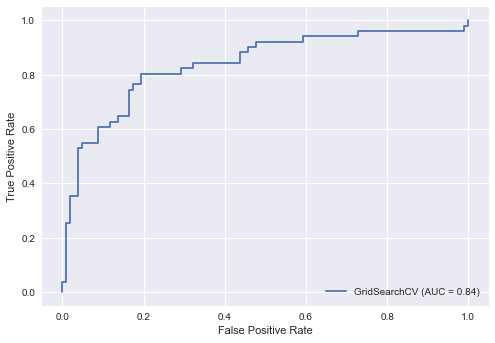

In [47]:
#Plot ROC curve and calculate AUC metric
plt.style.use('seaborn')
plot_roc_curve(gs_log_reg, x_test, y_test)

In [48]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[92, 11],
       [20, 31]], dtype=int64)

<AxesSubplot:>

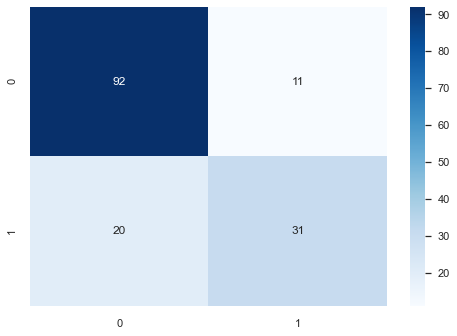

In [52]:
sns.set(font_scale = 1)
sns.heatmap(conf_mat, annot = True, cmap ="Blues")

In [53]:
print (classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.82      0.89      0.86       103
           1       0.74      0.61      0.67        51

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154

